**Applying Autoencoder Algorithms for Encoding Real-World Data:**

Autoencoders are a type of unsupervised neural network used for dimensionality reduction, anomaly detection, feature learning, and denoising. They compress input data into a lower-dimensional representation and then reconstruct the original data.

**Key Components of Autoencoders:**

* Encoder – Compresses the input into a latent representation.
* Bottleneck (Latent Space) – The compressed version of input data.
* Decoder – Reconstructs the input from the latent space.

**Steps to Apply Autoencoders**
* Load Real-World Data (e.g., Images, Tabular Data).
* Build an Autoencoder Model (Encoder + Decoder).
* Train the Model (Minimize reconstruction error).
* Use Encoded Data for Tasks (e.g., Feature Extraction, Anomaly Detection).

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train[0])
x_train = x_train/255
x_test = x_test/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0

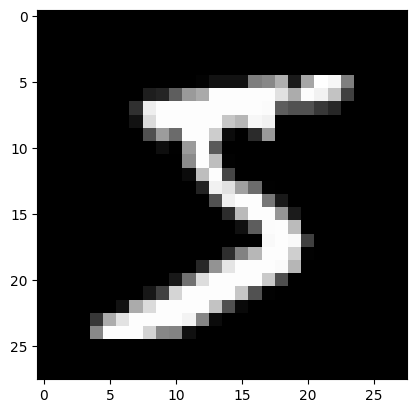

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")

In [4]:
#28*28 - 784 feature scaled between 0 and 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
x_train[0].shape

(28, 28)

In [6]:
#The model Architecture
#After encoder we bulid the decoder, and these two together make our autoencoder
encoder_input = keras.Input(shape=(28,28,1), name='img')
#x is flattening the encoder_input 28*28 to 784
x = keras.layers.Flatten()(encoder_input)
#compression after flattening
encoder_output = keras.layers.Dense(64, activation = 'relu')(x)
encoder=keras.Model(encoder_input,encoder_output, name='encoder')
'''So all this model does is take input of 28x28,
flatten to a vector of 784 values,
then go to a fully conneted dense layer of a mere 64 values
64/784=0.08163265306122448
we've compressed to a mere 8% of the original data'''
#Decoder
#The encoded ouput is 64 = 8*8 given as input to decoder is given to a dense layer
decoder_input = keras.layers.Dense(64, activation='relu')(encoder_output)
x=keras.layers.Dense(784,   activation='relu')(decoder_input)
#converting decoded 784 values into 28*28
decoder_output = keras.layers.Reshape((28,28,1))(x)

In [7]:
#Set an optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001, weight_decay=1e-6)
#Combine encoder and decoder into a singular "autoencoder" model
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)                     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#compile our model with the optimizer and a loss metric
autoencoder.compile(opt, loss='mse')

In [9]:
epochs = 3
for epoch in range(epochs):
    history = autoencoder.fit(x_train,
                              x_train,
                              epochs=1,
                              batch_size=32,
                              validation_split=0.10)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0311 - val_loss: 0.0139
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0133 - val_loss: 0.0123
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0122 - val_loss: 0.0118


In [10]:
example=encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
print(example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[1.4733751  1.1864036  0.04127228 0.872877   0.         2.0870955
 0.         1.767428   0.8852005  2.0747008  0.4823388  0.10216539
 0.5192474  1.7478207  1.2899047  1.1248083  0.         1.8435384
 2.533684   0.8242759  1.980567   1.8552262  0.38075796 1.3577023
 0.34783894 0.7695574  1.9193066  0.62615913 1.4294697  1.30355
 1.6415191  2.9237156  1.6658336  0.7717279  0.84624183 2.7884362
 0.8055047  0.28395492 1.5906509  1.0592782  1.1435884  1.4824345
 1.0533135  0.28303832 1.3316128  0.7726908  1.2775164  2.5027258
 2.0472047  1.2467052  2.333976   1.7533726  2.29605    1.974526
 1.7437538  0.4819671  0.59091234 0.9987102  1.1099395  0.92166805
 0.70168316 2.0294788  1.4010658  1.4016312 ]


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: img
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)


In [11]:
example.shape

(64,)

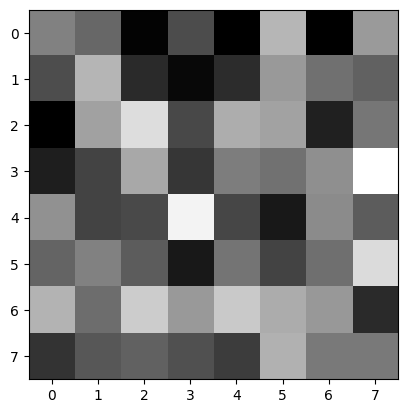

In [12]:
plt.imshow(example.reshape(8,8), cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


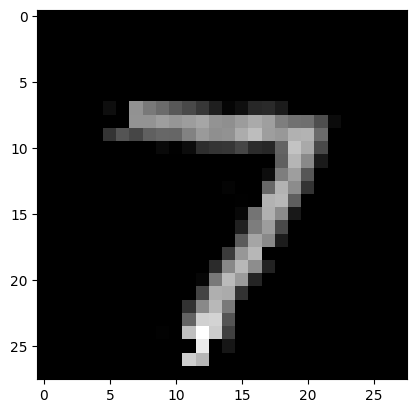

In [13]:
#decompression from 8*8=64 to 28*28=784
ae_out = autoencoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
plt.imshow(ae_out, cmap='gray')

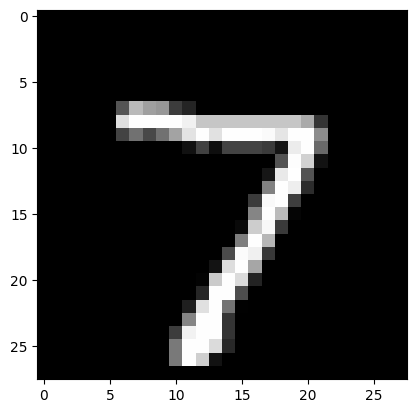

In [14]:
#Original image
plt.imshow(x_test[0],cmap='gray')

In [15]:
#randomly add 5% of the noise
#changing values of pixels
import random
def add_noise(img, random_chance=5):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100)) <= random_chance:
                new_val = random.uniform(0,1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

In [16]:
#Add noise to x_train[0]
noisy = add_noise(x_train[0])

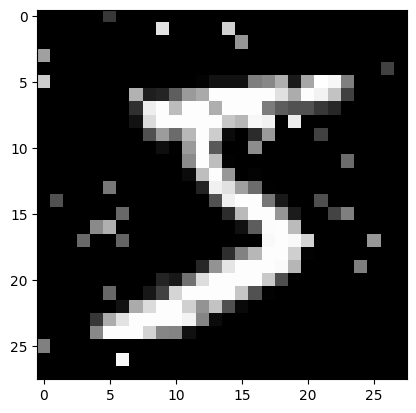

In [17]:
plt.imshow(noisy, cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


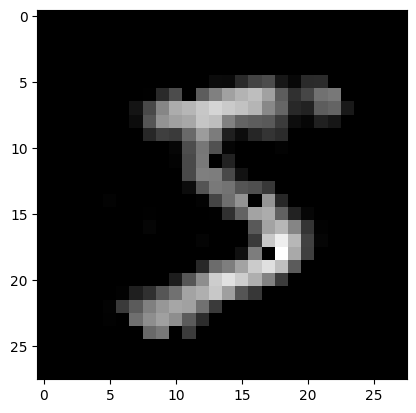

In [18]:
ae_out = autoencoder.predict([noisy.reshape(-1,28,28,1)])
img = ae_out[0]
plt.imshow(ae_out[0], cmap='gray')